In [30]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import warnings


# Suppress MNE output
mne.set_log_level('error')  # Only display errors

# Suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Paths
cond = "img"
data_folder = "/projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw"
participants = [2,3,4,5,7,8,10,11,12,13]  # Add participant IDs here


# Add your specific stimuli of interest
allowed_events = np.array([1, 2, 3, 4]) 

# Parameters
tmin, tmax = -0.2, 0.5  # Epoch time window in seconds
baseline = (None, 0)    # Baseline correction (before stimulus onset)
picks = "eeg"           # Channels to use (only EEG channels)

grand_avg_dict = {}
for cond in ["img", "fix"]:
    for cond2 in ["det", "random"]:
        if cond2 == "det":
            allowed_events = np.array([1, 2, 3, 4]) 
        else:
            allowed_events = np.array([11, 12, 13, 14])
              
        condition = f"{cond}_{cond2}"
        print(f"{condition}: {allowed_events}")
        grand_avg_dict[condition] = []
        raw_files = [os.path.join(data_folder, f"sub{sub:02d}", f"eeg_things_{cond}_{sub:04d}.vhdr") for sub in participants]

        # Loop through participants
        for raw_file in raw_files:
            print(f"Processing: {raw_file}")

            # Load raw data
            raw = mne.io.read_raw_brainvision(raw_file, preload=True)

            # Filter data (optional, for ERP analysis)
            raw.filter(None, 40., fir_design='firwin')  # Bandpass filter 1-30 Hz

            events, events_id = mne.events_from_annotations(raw)
            events  = events[2:, :]
            events_filtered = events[np.isin(events[:, 2], allowed_events)]


            # Create epochs for the specific events
            epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax,
                                baseline=baseline, picks=picks, preload=True)

            # Average to compute evoked response
            evoked = epochs.average()
            grand_avg_dict[condition].append(evoked)



img_det: [1 2 3 4]
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub02/eeg_things_img_0002.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub03/eeg_things_img_0003.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub04/eeg_things_img_0004.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub05/eeg_things_img_0005.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub07/eeg_things_img_0007.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub08/eeg_things_img_0008.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub10/eeg_things_img_0010.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub11/eeg_things_img_0011.vhdr
Processing: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_raw/sub12/eeg_things_img_0012.vhdr
Processing: /projects/crunchie/boyan

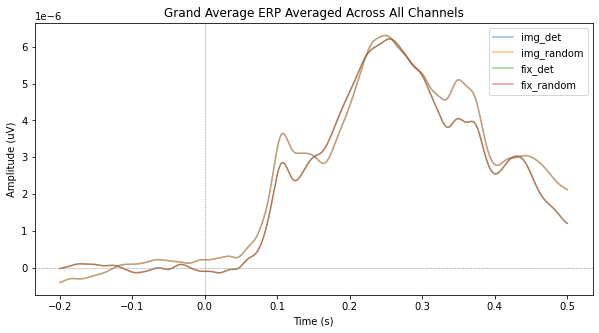

In [32]:
plt.figure(figsize=(10, 5))

# Plot grand average ERP averaged across channels
for cond in grand_avg_dict.keys():
    grand_average = mne.grand_average(grand_avg_dict[cond])
    times = grand_average.times
    grand_average_data = grand_average.data.mean(axis=0) 
    plt.plot(times, grand_average_data, alpha = 0.5, label = cond)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5,)  # Baseline line
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)  # Stimulus onset line
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (uV)")
plt.title("Grand Average ERP Averaged Across All Channels")
plt.legend()
plt.show()

In [36]:
(1440 / 2) / 4

180.0

In [37]:
1200 / 4

300.0

In [1]:
import os
os.getcwd()

'/projects/crunchie/boyanova/EEG_Things/eeg_experiment/scripts_nb'